<a href="https://colab.research.google.com/github/DMXMax/covid19/blob/gc_20200315/coviddata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests,json
import datetime


In [0]:
covidtrackingurl = "https://covidtracking.com/api/v1/states/daily.json"
response = requests.get(covidtrackingurl)
dfCovidtracking = pd.DataFrame(response.json())
dfCovidtracking.fillna(0, inplace=True)
dfCovidtracking.negative = dfCovidtracking.negative.astype('int64')
dfCovidtracking.positive = dfCovidtracking.positive.astype('int64')
dfCovidtracking.pending = dfCovidtracking.pending.astype('int64')
dfCovidtracking.total = dfCovidtracking.total.astype('int64')
dfCovidtracking.death = dfCovidtracking.death.astype('int64')

dfCovidtracking.date = dfCovidtracking.date.transform(lambda x: pd.to_datetime(datetime.date(x//10000, x%10000//100, x%100
                                          )))
dfCovidtracking.set_index(['date'], inplace=True)


In [0]:
dfWHO = pd.read_csv("https://raw.githubusercontent.com/DMXMax/covid19/master/who/who_data.tsv",
                     sep='\t', index_col='Date')

In [0]:
jhurl = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/"+\
"csse_covid_19_data/csse_covid_19_daily_reports/06-03-2020.csv"


dfJHUData = pd.read_csv(jhurl, header=0, usecols=[0,1,2,3,4,5,6,7,8,9,10,11],
                        names=['FIPS', 'city','state', 'country', 'last_update',
                               'lat', 'lon','confirmed', 'dead', 'recovered','active', 'key'])

In [0]:
dfWHO = dfWHO.rename(columns={"Confirmed": "confirmed", "Deaths": "who_deaths"})
dfWHO.index.names=['date']


In [94]:
print("US Summary")
dfCovidtracking.groupby(by='date').sum()[-3:][['positive', 'death', 'positiveIncrease', 'deathIncrease']]

US Summary


,positive,death,positiveIncrease,deathIncrease
date,,,,
2020-06-02,1823269,100246,23508,1168
2020-06-03,1843315,101217,20046,971
2020-06-04,1864112,102101,20797,884


In [95]:
dfCovidtracking.loc[dfCovidtracking.state=='CA'].groupby(by='date').sum()[['positive', 'death', 'positiveIncrease', 'deathIncrease']].tail()

,positive,death,positiveIncrease,deathIncrease
date,,,,
2020-05-31,110583,4213,3705,57
2020-06-01,113006,4251,2423,38
2020-06-02,115310,4286,2304,35
2020-06-03,117687,4361,2377,75
2020-06-04,119807,4422,2120,61


In [96]:
dfctd_state_curr = dfCovidtracking.loc[dfCovidtracking.index.max()] \
  .rename(columns={'positive':'total_positive'}) \
  .set_index('state') 

print(f"Total positive cases = {dfctd_state_curr.total_positive.sum()}")
print(f"Total deaths = {dfctd_state_curr.death.sum()}")
  
dfctd_state_curr.sort_values(by='total_positive', ascending=False).head(5)

Total positive cases = 1864112
Total deaths = 102101


,total_positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,onVentilatorCumulative,recovered,dataQualityGrade,lastUpdateEt,dateModified,checkTimeEt,death,hospitalized,dateChecked,fips,positiveIncrease,negativeIncrease,total,totalTestResults,totalTestResultsIncrease,posNeg,deathIncrease,hospitalizedIncrease,hash,commercialScore,negativeRegularScore,negativeScore,positiveScore,score,grade
state,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
NY,375133,1917899,0,2849.0,89995.0,832.0,0.0,613.0,0.0,66756.0,A,6/4/2020 00:00,2020-06-04T00:00:00Z,06/03 20:00,24133,89995.0,2020-06-04T00:00:00Z,36,1048,62511,2293032,2293032,63559,2293032,54,0,efc486be5369a33da6e168b16b420beb294162a4,0,0,0,0,0,
NJ,162530,695199,0,1982.0,17604.0,537.0,0.0,459.0,0.0,27231.0,A+,6/4/2020 13:00,2020-06-04T13:00:00Z,06/04 09:00,11970,17604.0,2020-06-04T13:00:00Z,34,462,19847,857729,857729,20309,857729,90,214,ac679df371e6ef75e20ffabd649a73b5308d1650,0,0,0,0,0,
IL,124759,857257,0,3044.0,0.0,853.0,0.0,516.0,0.0,0.0,A,6/4/2020 00:00,2020-06-04T00:00:00Z,06/03 20:00,5736,0.0,2020-06-04T00:00:00Z,17,929,21912,982016,982016,22841,982016,115,0,02a44ab0335d2e9b8adace0b592fd296ed7fa50e,0,0,0,0,0,
CA,119807,2062864,0,4455.0,0.0,1279.0,0.0,0.0,0.0,0.0,B,6/4/2020 00:00,2020-06-04T00:00:00Z,06/03 20:00,4422,0.0,2020-06-04T00:00:00Z,06,2120,49257,2182671,2182671,51377,2182671,61,0,5cdcb7fa39f76830e92844746fce7dd6fa72c3e2,0,0,0,0,0,
MA,102063,522872,0,1637.0,10238.0,401.0,0.0,249.0,0.0,0.0,A+,6/4/2020 10:00,2020-06-04T10:00:00Z,06/04 06:00,7201,10238.0,2020-06-04T10:00:00Z,25,471,6703,624935,624935,7174,624935,49,87,3a9cabc4a8195e574590d7982a0d9c3f29e5f7b1,0,0,0,0,0,


In [0]:
curr_state = 'CA'
gbUSA = dfCovidtracking.groupby(['date'])
gbState = dfCovidtracking[dfCovidtracking.state==curr_state].groupby(['date'])

cols = ['positive', 'totalTestResults', 'death', 'positiveIncrease','deathIncrease']

dfUSAPos = gbUSA[cols].sum().reset_index().copy()
dfStatePos = gbState[cols].sum().reset_index().copy()

#This will calculate the percentage each day is of the total. In a flattening, this will be more even
# In a high growth situation, you'll higher percentages at the tail. 

dfUSAPos['pos_pct']= dfUSAPos.positive/dfctd_state_curr.total_positive.sum()
dfStatePos['pos_pct']=dfStatePos.positive/dfctd_state_curr.loc[curr_state].total_positive

In [98]:
dfUSAPos[-7:]


,date,positive,totalTestResults,death,positiveIncrease,deathIncrease,pos_pct
128,2020-05-29,1736571,16099515,96963,23934,1185,0.931581
129,2020-05-30,1761025,16530685,97933,24454,970,0.944699
130,2020-05-31,1783570,16936891,98600,22545,667,0.956793
131,2020-06-01,1799761,17340682,99078,16191,478,0.965479
132,2020-06-02,1823269,17757838,100246,23508,1168,0.978090
133,2020-06-03,1843315,18214950,101217,20046,971,0.988843
134,2020-06-04,1864112,18680529,102101,20797,884,1.000000


In [99]:
dfStatePos[-7:]

,date,positive,totalTestResults,death,positiveIncrease,deathIncrease,pos_pct
86,2020-05-29,103886,1835478,4068,2189,95,0.867111
87,2020-05-30,106878,1888595,4156,2992,88,0.892085
88,2020-05-31,110583,1944848,4213,3705,57,0.923010
89,2020-06-01,113006,2012583,4251,2423,38,0.943234
90,2020-06-02,115310,2071591,4286,2304,35,0.962465
91,2020-06-03,117687,2131294,4361,2377,75,0.982305
92,2020-06-04,119807,2182671,4422,2120,61,1.000000


In [100]:
gbUSA.sum()[-5:]

,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,onVentilatorCumulative,recovered,death,hospitalized,positiveIncrease,negativeIncrease,total,totalTestResults,totalTestResultsIncrease,posNeg,deathIncrease,hospitalizedIncrease,commercialScore,negativeRegularScore,negativeScore,positiveScore,score
date,,,,,,,,,,,,,,,,,,,,,,,,,
2020-05-31,1783570,15153321,3270,33840.0,210083.0,7623.0,8445.0,3669.0,704.0,444758.0,98600,210083.0,22545,383661,16940161,16936891,406206,16936891,667,949,0,0,0,0,0
2020-06-01,1799761,15540921,3455,33237.0,212704.0,7620.0,8485.0,3661.0,704.0,458231.0,99078,212704.0,16191,387600,17344137,17340682,403791,17340682,478,2621,0,0,0,0,0
2020-06-02,1823269,15934569,4054,32728.0,214382.0,7403.0,8566.0,3852.0,710.0,463868.0,100246,214382.0,23508,393648,17761892,17757838,417156,17757838,1168,1678,0,0,0,0,0
2020-06-03,1843315,16371635,3556,32081.0,216640.0,7224.0,8688.0,3749.0,717.0,479258.0,101217,216640.0,20046,437066,18218506,18214950,457112,18214950,971,2258,0,0,0,0,0
2020-06-04,1864112,16816417,3474,31659.0,213812.0,7054.0,8787.0,3665.0,723.0,485002.0,102101,213812.0,20797,444782,18684003,18680529,465579,18680529,884,-2828,0,0,0,0,0


In [101]:
gbState.sum()[-5:]

,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,onVentilatorCumulative,recovered,death,hospitalized,positiveIncrease,negativeIncrease,total,totalTestResults,totalTestResultsIncrease,posNeg,deathIncrease,hospitalizedIncrease,commercialScore,negativeRegularScore,negativeScore,positiveScore,score
date,,,,,,,,,,,,,,,,,,,,,,,,,
2020-05-31,110583,1834265,0,4331.0,0.0,1324.0,0.0,0.0,0.0,0.0,4213,0.0,3705,52548,1944848,1944848,56253,1944848,57,0,0,0,0,0,0
2020-06-01,113006,1899577,0,4258.0,0.0,1273.0,0.0,0.0,0.0,0.0,4251,0.0,2423,65312,2012583,2012583,67735,2012583,38,0,0,0,0,0,0
2020-06-02,115310,1956281,0,4393.0,0.0,1286.0,0.0,0.0,0.0,0.0,4286,0.0,2304,56704,2071591,2071591,59008,2071591,35,0,0,0,0,0,0
2020-06-03,117687,2013607,0,4458.0,0.0,1313.0,0.0,0.0,0.0,0.0,4361,0.0,2377,57326,2131294,2131294,59703,2131294,75,0,0,0,0,0,0
2020-06-04,119807,2062864,0,4455.0,0.0,1279.0,0.0,0.0,0.0,0.0,4422,0.0,2120,49257,2182671,2182671,51377,2182671,61,0,0,0,0,0,0


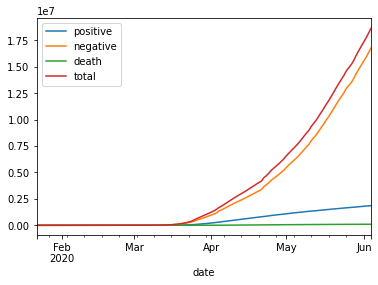

In [102]:
x=gbUSA.sum().loc[:, ['positive', 'negative','death','total']].plot.line()

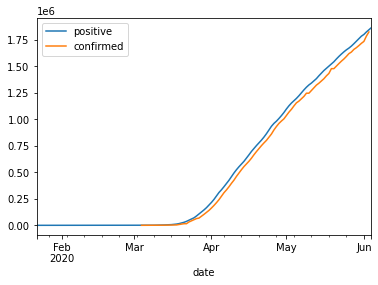

In [103]:
dfResults = gbUSA.sum().join(dfWHO, how='left', rsuffix='_who' )
dfResults.loc[:, ['positive', 'confirmed']].plot.line()

# John Hopkins Data


In [104]:
dfJHUData[dfJHUData.country=='US'][['confirmed', 'dead']].sum()

confirmed    1851520
dead          107175
dtype: int64

In [105]:
dfJHUData[(dfJHUData.country=='US')&(dfJHUData.state=='California')][['confirmed', 'dead']].sum()

confirmed    119348
dead           4374
dtype: int64

In [0]:
dfJHUUS = dfJHUData[dfJHUData.country=='US']
gbJHUByState= dfJHUUS.groupby(by='state')
gbJHUByCountry = dfJHUData.groupby(by='country')

In [107]:
dfJHUData.head()

,FIPS,city,state,country,last_update,lat,lon,confirmed,dead,recovered,active,key
0,45001.0,Abbeville,South Carolina,US,2020-06-04 02:33:14,34.223334,-82.461707,46,0,0,46,"Abbeville, South Carolina, US"
1,22001.0,Acadia,Louisiana,US,2020-06-04 02:33:14,30.295065,-92.414197,446,26,0,420,"Acadia, Louisiana, US"
2,51001.0,Accomack,Virginia,US,2020-06-04 02:33:14,37.767072,-75.632346,953,12,0,941,"Accomack, Virginia, US"
3,16001.0,Ada,Idaho,US,2020-06-04 02:33:14,43.452658,-116.241552,818,22,0,796,"Ada, Idaho, US"
4,19001.0,Adair,Iowa,US,2020-06-04 02:33:14,41.330756,-94.471059,9,0,0,9,"Adair, Iowa, US"


In [108]:
gbJHUByCountry.confirmed.sum().sort_values(ascending=False).head(10)

country
US                1851520
Brazil             584016
Russia             431715
United Kingdom     281270
Spain              240326
Italy              233836
India              216824
France             192330
Germany            184121
Peru               178914
Name: confirmed, dtype: int64

In [109]:
dfctd_state_curr.head()

,total_positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,onVentilatorCumulative,recovered,dataQualityGrade,lastUpdateEt,dateModified,checkTimeEt,death,hospitalized,dateChecked,fips,positiveIncrease,negativeIncrease,total,totalTestResults,totalTestResultsIncrease,posNeg,deathIncrease,hospitalizedIncrease,hash,commercialScore,negativeRegularScore,negativeScore,positiveScore,score,grade
state,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
AK,513,59584,0,13.0,0.0,0.0,0.0,1.0,0.0,376.0,A,6/4/2020 00:00,2020-06-04T00:00:00Z,06/03 20:00,10,0.0,2020-06-04T00:00:00Z,02,8,1907,60097,60097,1915,60097,0,0,c1046011af7271cbe2e6698526714c6cb5b92748,0,0,0,0,0,
AL,19072,216227,0,0.0,1929.0,0.0,601.0,0.0,357.0,11395.0,B,6/4/2020 00:00,2020-06-04T00:00:00Z,06/03 20:00,653,1929.0,2020-06-04T00:00:00Z,01,221,3484,235299,235299,3705,235299,0,29,bcbefdb36212ba2b97b5a354f4e45bf16648ee23,0,0,0,0,0,
AR,8067,134413,0,138.0,757.0,0.0,0.0,30.0,127.0,5717.0,A,6/4/2020 00:00,2020-06-04T00:00:00Z,06/03 20:00,142,757.0,2020-06-04T00:00:00Z,05,0,0,142480,142480,0,142480,0,26,acd3a4fbbc3dbb32138725f91e3261d683e7052a,0,0,0,0,0,
AS,0,174,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,C,6/1/2020 00:00,2020-06-01T00:00:00Z,05/31 20:00,0,0.0,2020-06-01T00:00:00Z,60,0,0,174,174,0,174,0,0,8bbc72fa42781e0549e2e4f9f4c3e7cbef14ab32,0,0,0,0,0,
AZ,22753,227002,0,1079.0,3195.0,375.0,0.0,223.0,0.0,5172.0,A+,6/4/2020 00:00,2020-06-04T00:00:00Z,06/03 20:00,996,3195.0,2020-06-04T00:00:00Z,04,520,4710,249755,249755,5230,249755,15,66,1fa237b8204cd23701577aef6338d339daa4452e,0,0,0,0,0,


In [0]:
dfState = dfCovidtracking.reset_index()[['date','state','positive', 'death']].set_index('state') \
  .join(dfctd_state_curr.total_positive)

In [0]:
dfState['pct']=dfState.positive/dfState.total_positive

In [112]:
dfState.loc['FL'].head(7)

,date,positive,death,total_positive,pct
state,,,,,
FL,2020-06-04,60183,2691,60183,1.000000
FL,2020-06-03,58764,2650,60183,0.976422
FL,2020-06-02,57447,2613,60183,0.954539
FL,2020-06-01,56830,2543,60183,0.944287
FL,2020-05-31,56163,2534,60183,0.933204
FL,2020-05-30,55424,2530,60183,0.920925
FL,2020-05-29,54497,2495,60183,0.905521


In [0]:
res = dfState.reset_index().pivot(index = 'date', columns='state', values='pct').fillna(0)

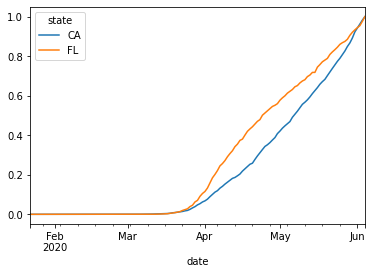

In [114]:
x = res.loc[:, ['CA','FL']].plot.line()

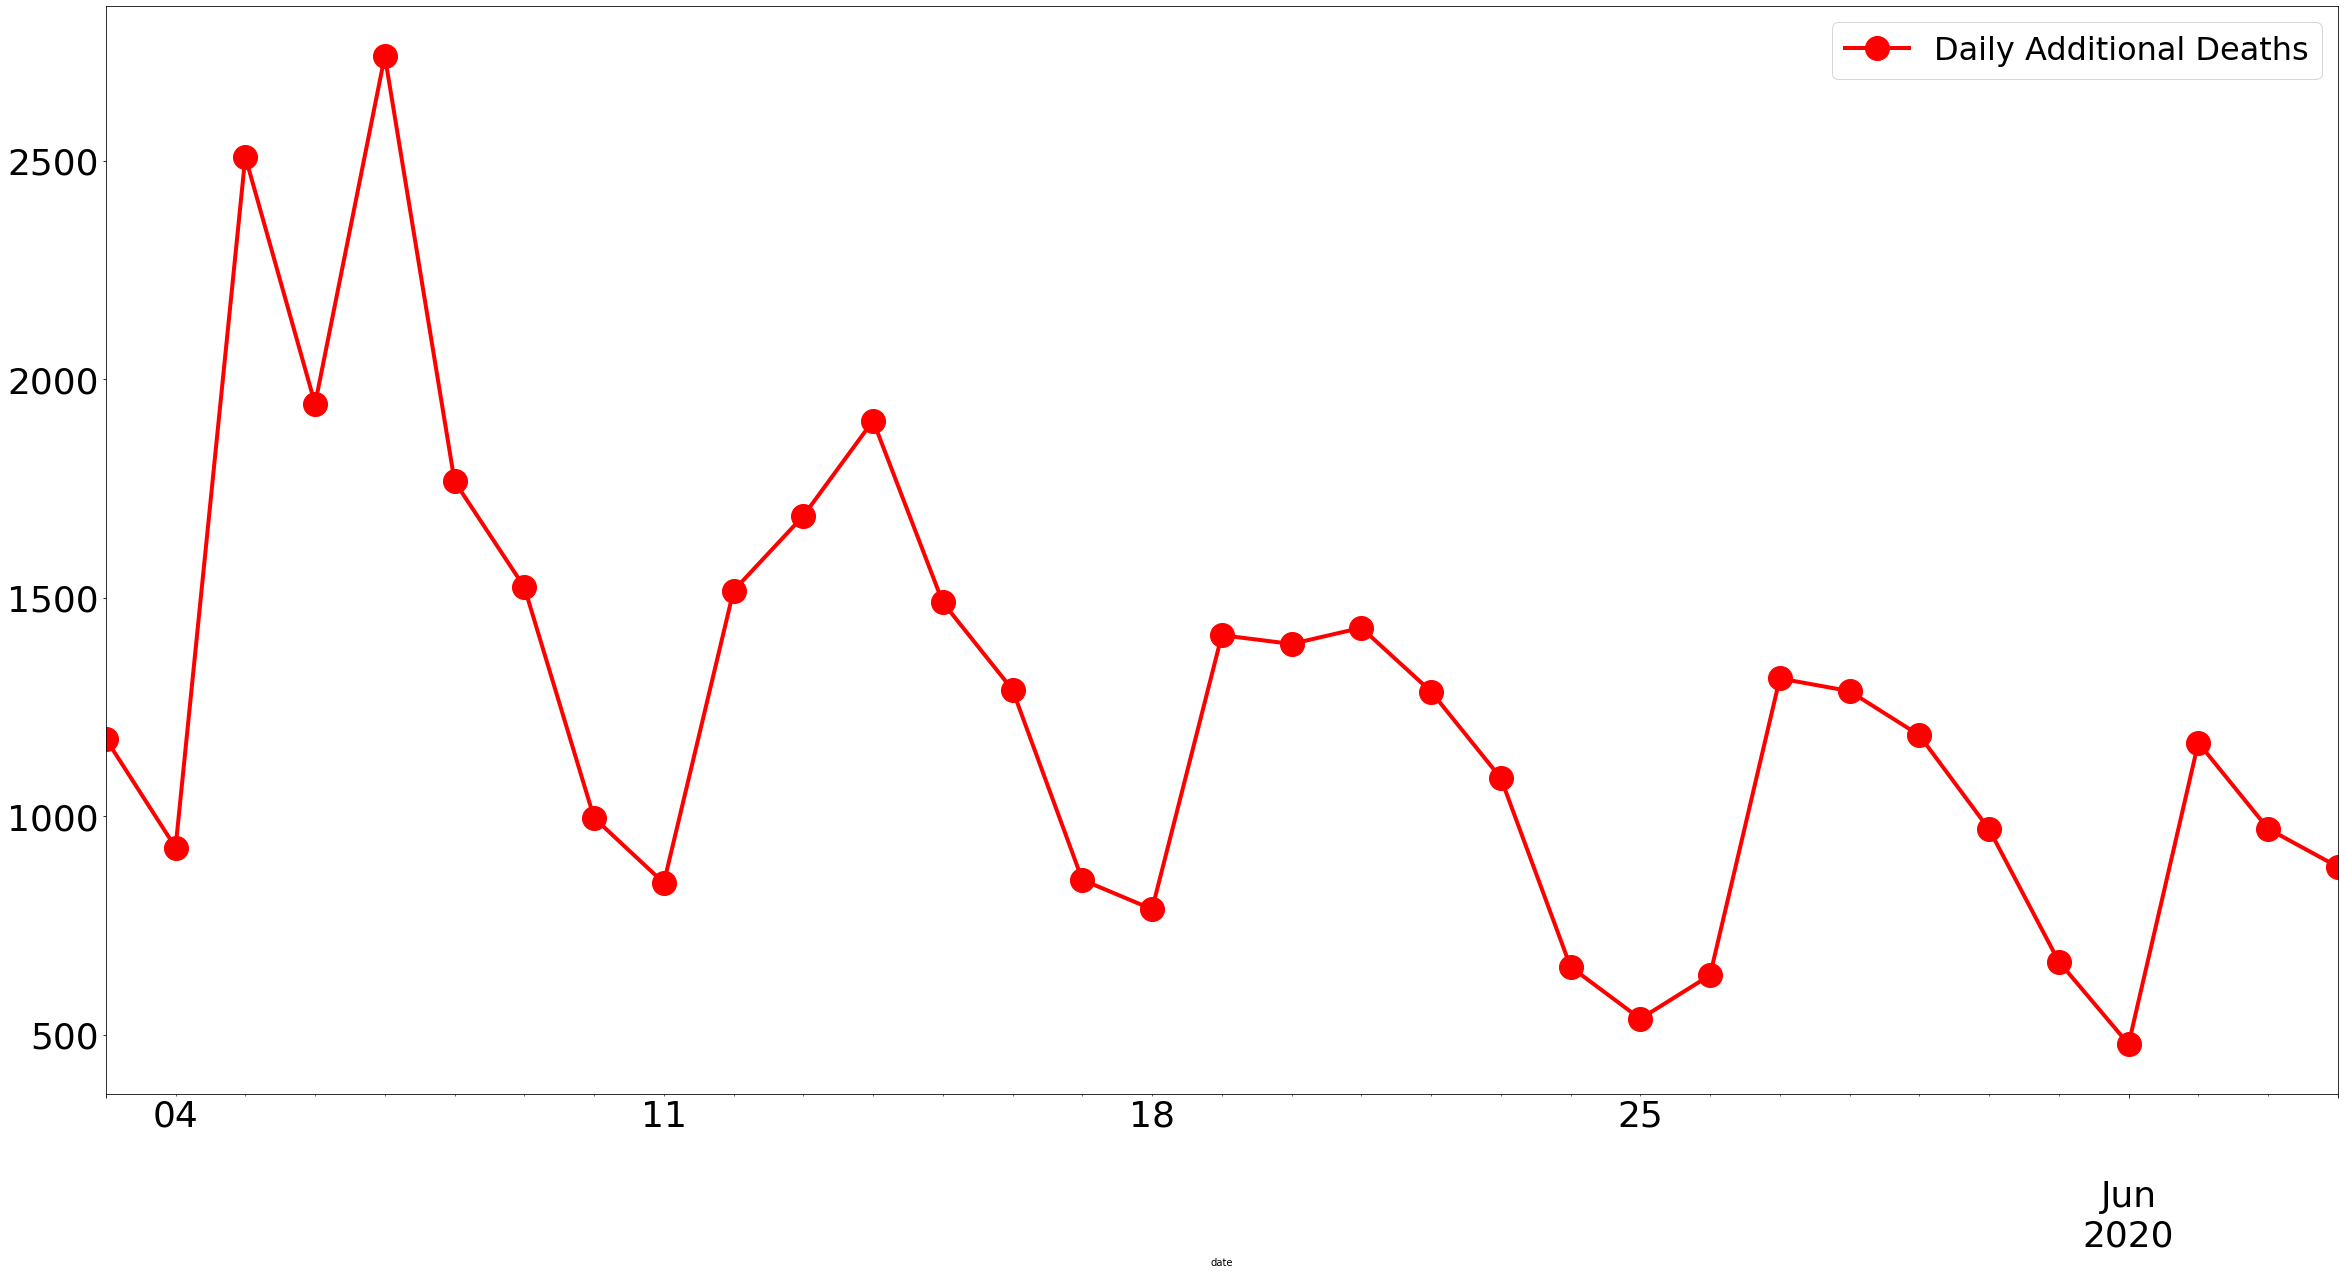

In [115]:
x = dfCovidtracking.groupby(by='date')
y1=x.sum()[-33:].deathIncrease.plot.line(figsize=(40,20), fontsize=36, \
  style='.-', markersize=48, color='red', linewidth=4) \
.legend(['Daily Additional Deaths'],fontsize=32)


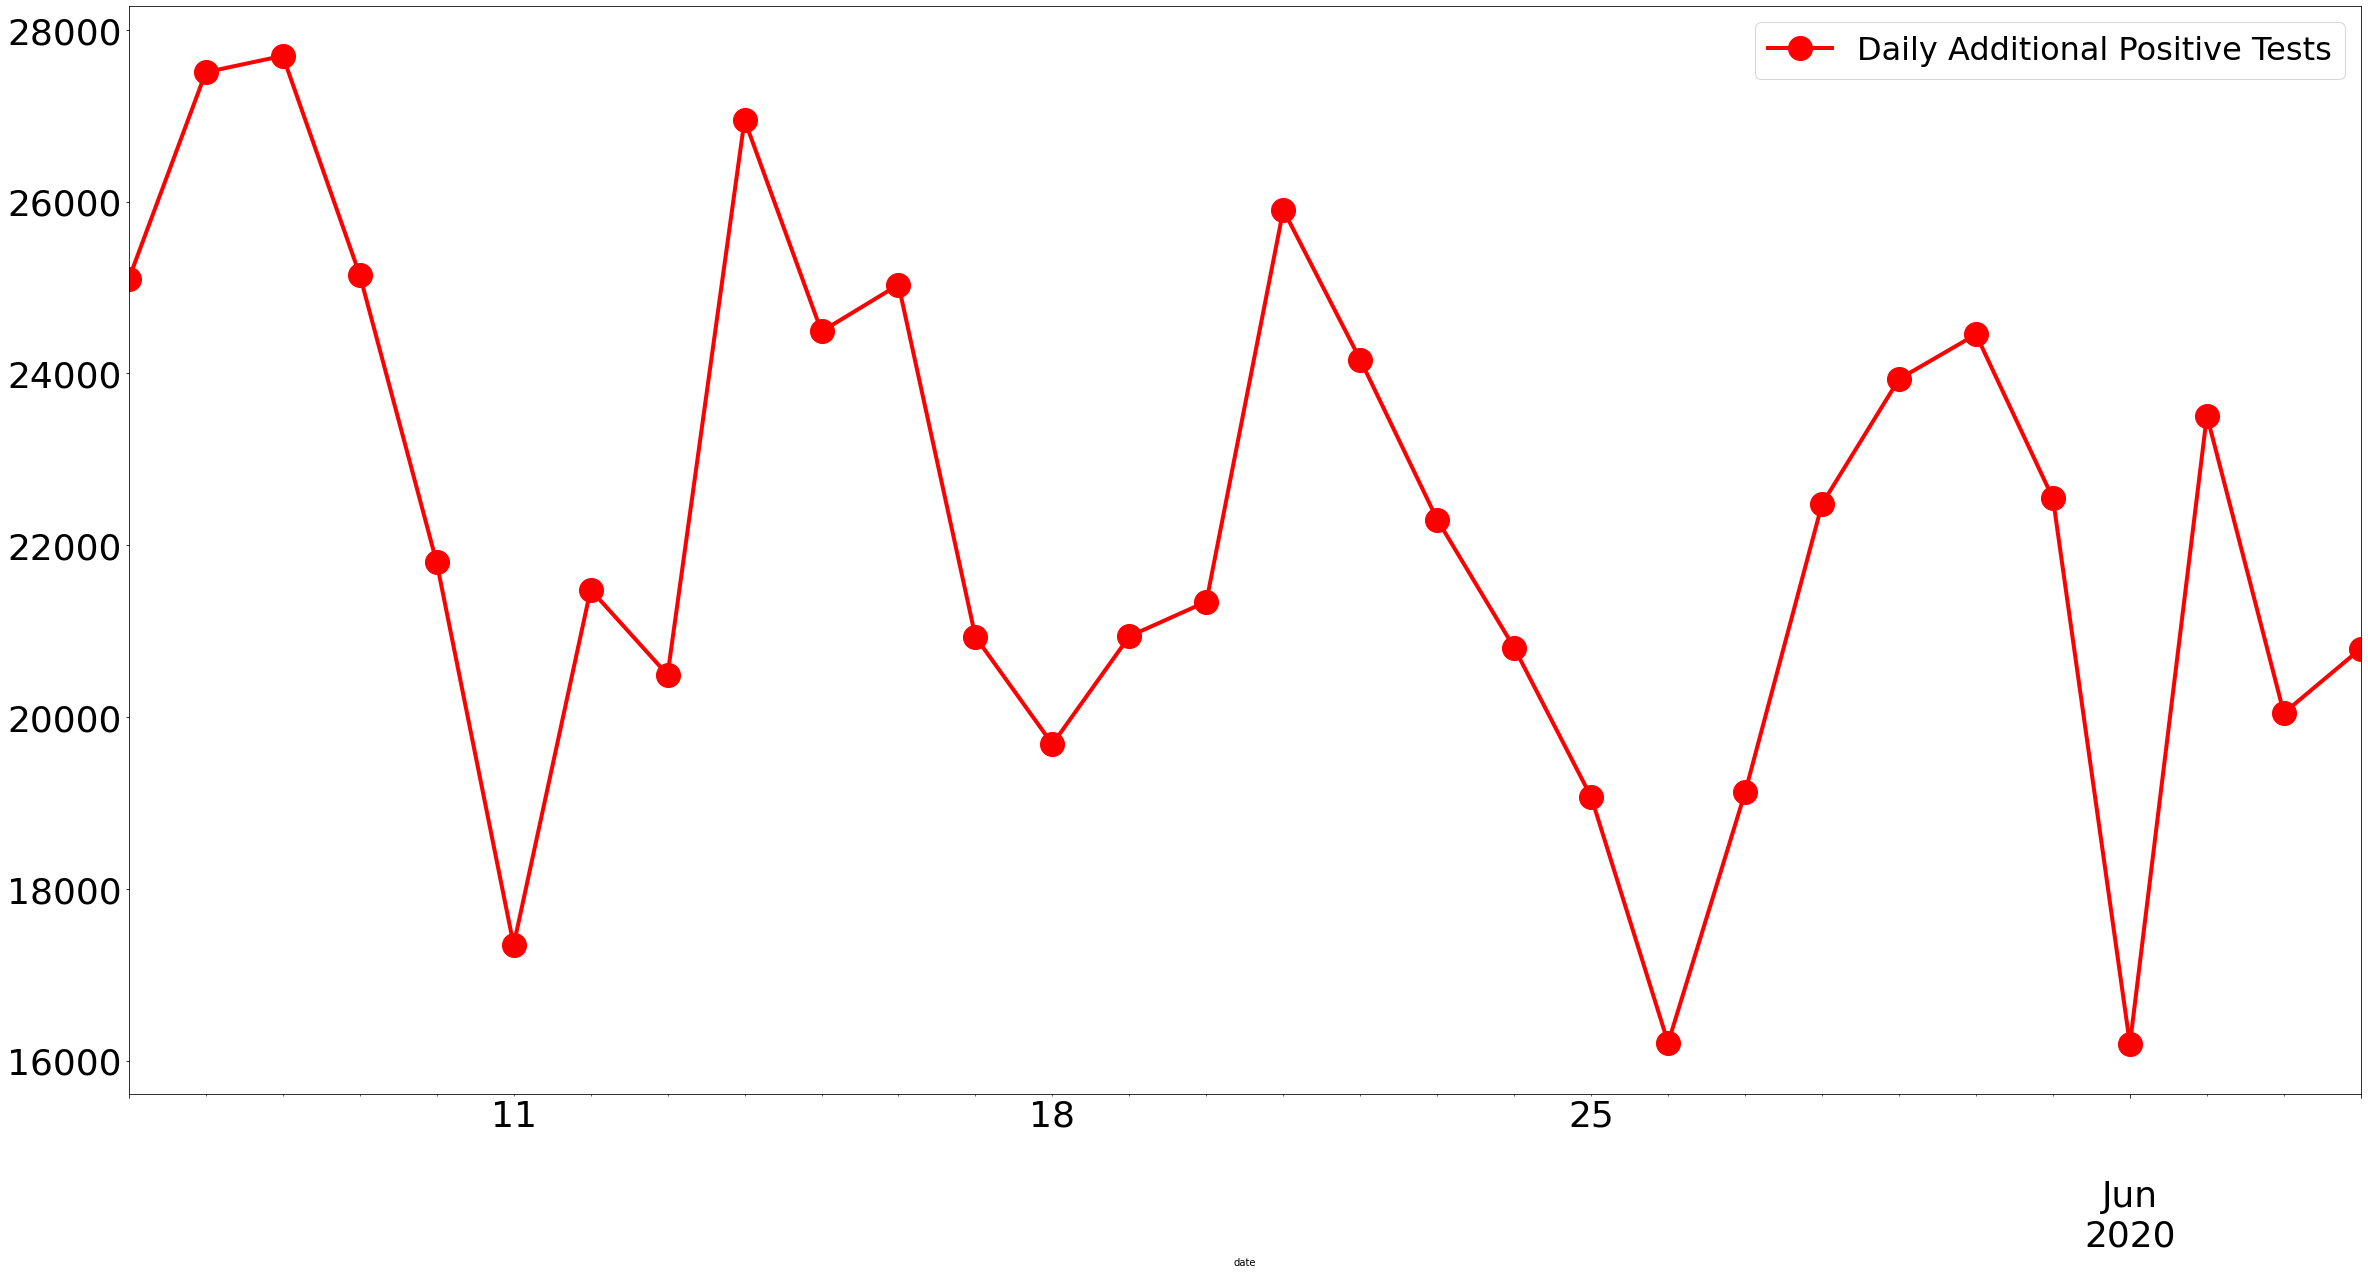

In [116]:
x = dfCovidtracking.groupby(by='date')
y1=x.sum()

chart = y1[-30:].positiveIncrease.plot.line(figsize=(40,20), fontsize=36, \
  style='.-', markersize=48, color='red', linewidth=4) \
.legend(['Daily Additional Positive Tests'],fontsize=32)


In [0]:
def getWeek(dt):
  return (dt.year*100)+dt.week

dfByWeekYear = dfCovidtracking[['deathIncrease', 'hospitalizedIncrease', 'negativeIncrease','positiveIncrease','totalTestResultsIncrease']].groupby(by=getWeek)


In [0]:
def getWeek(dt):
  return (dt.year*100)+dt.week

dfDoW = dfCovidtracking[['deathIncrease', 'hospitalizedIncrease', 'negativeIncrease','positiveIncrease','totalTestResultsIncrease']].groupby(by=lambda x: x.dayofweek)


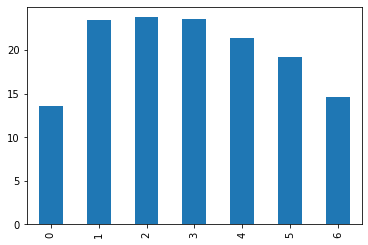

In [119]:
dfDoW.mean().deathIncrease.plot.bar()



In [120]:
dfByWeekYear.sum()[-7:]

,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
202017,12877,18476,1319356,209064,1528420
202018,12704,24581,1462961,191865,1654826
202019,12406,18998,1738094,171010,1909104
202020,9587,12129,2324282,156723,2481005
202021,8053,15648,2548088,155132,2703220
202022,6595,26480,2625387,147810,2773197
202023,3501,3729,1663096,80542,1743638


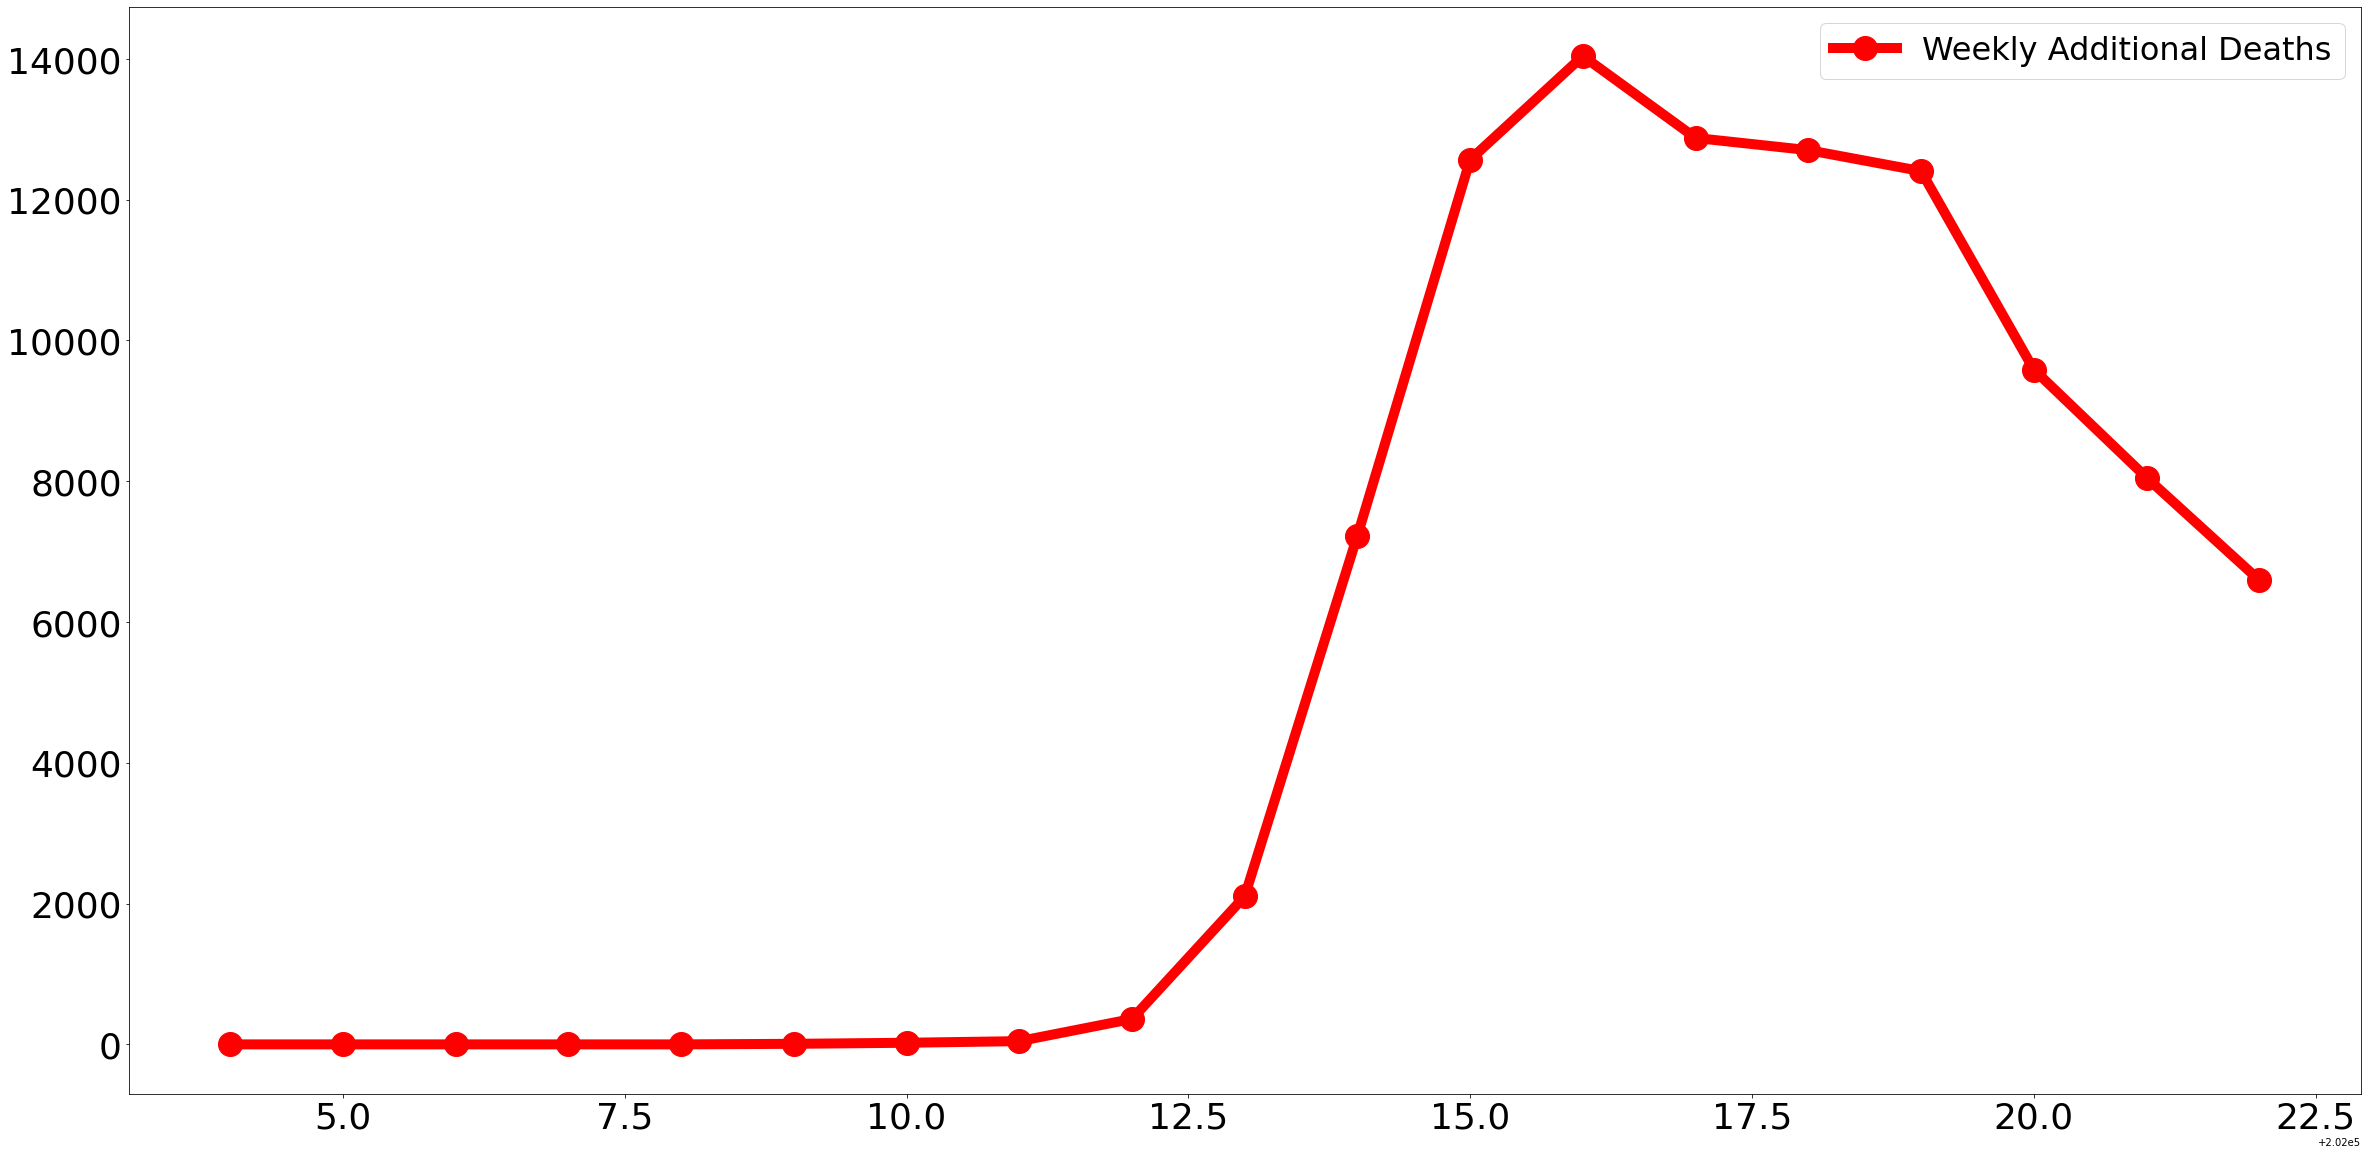

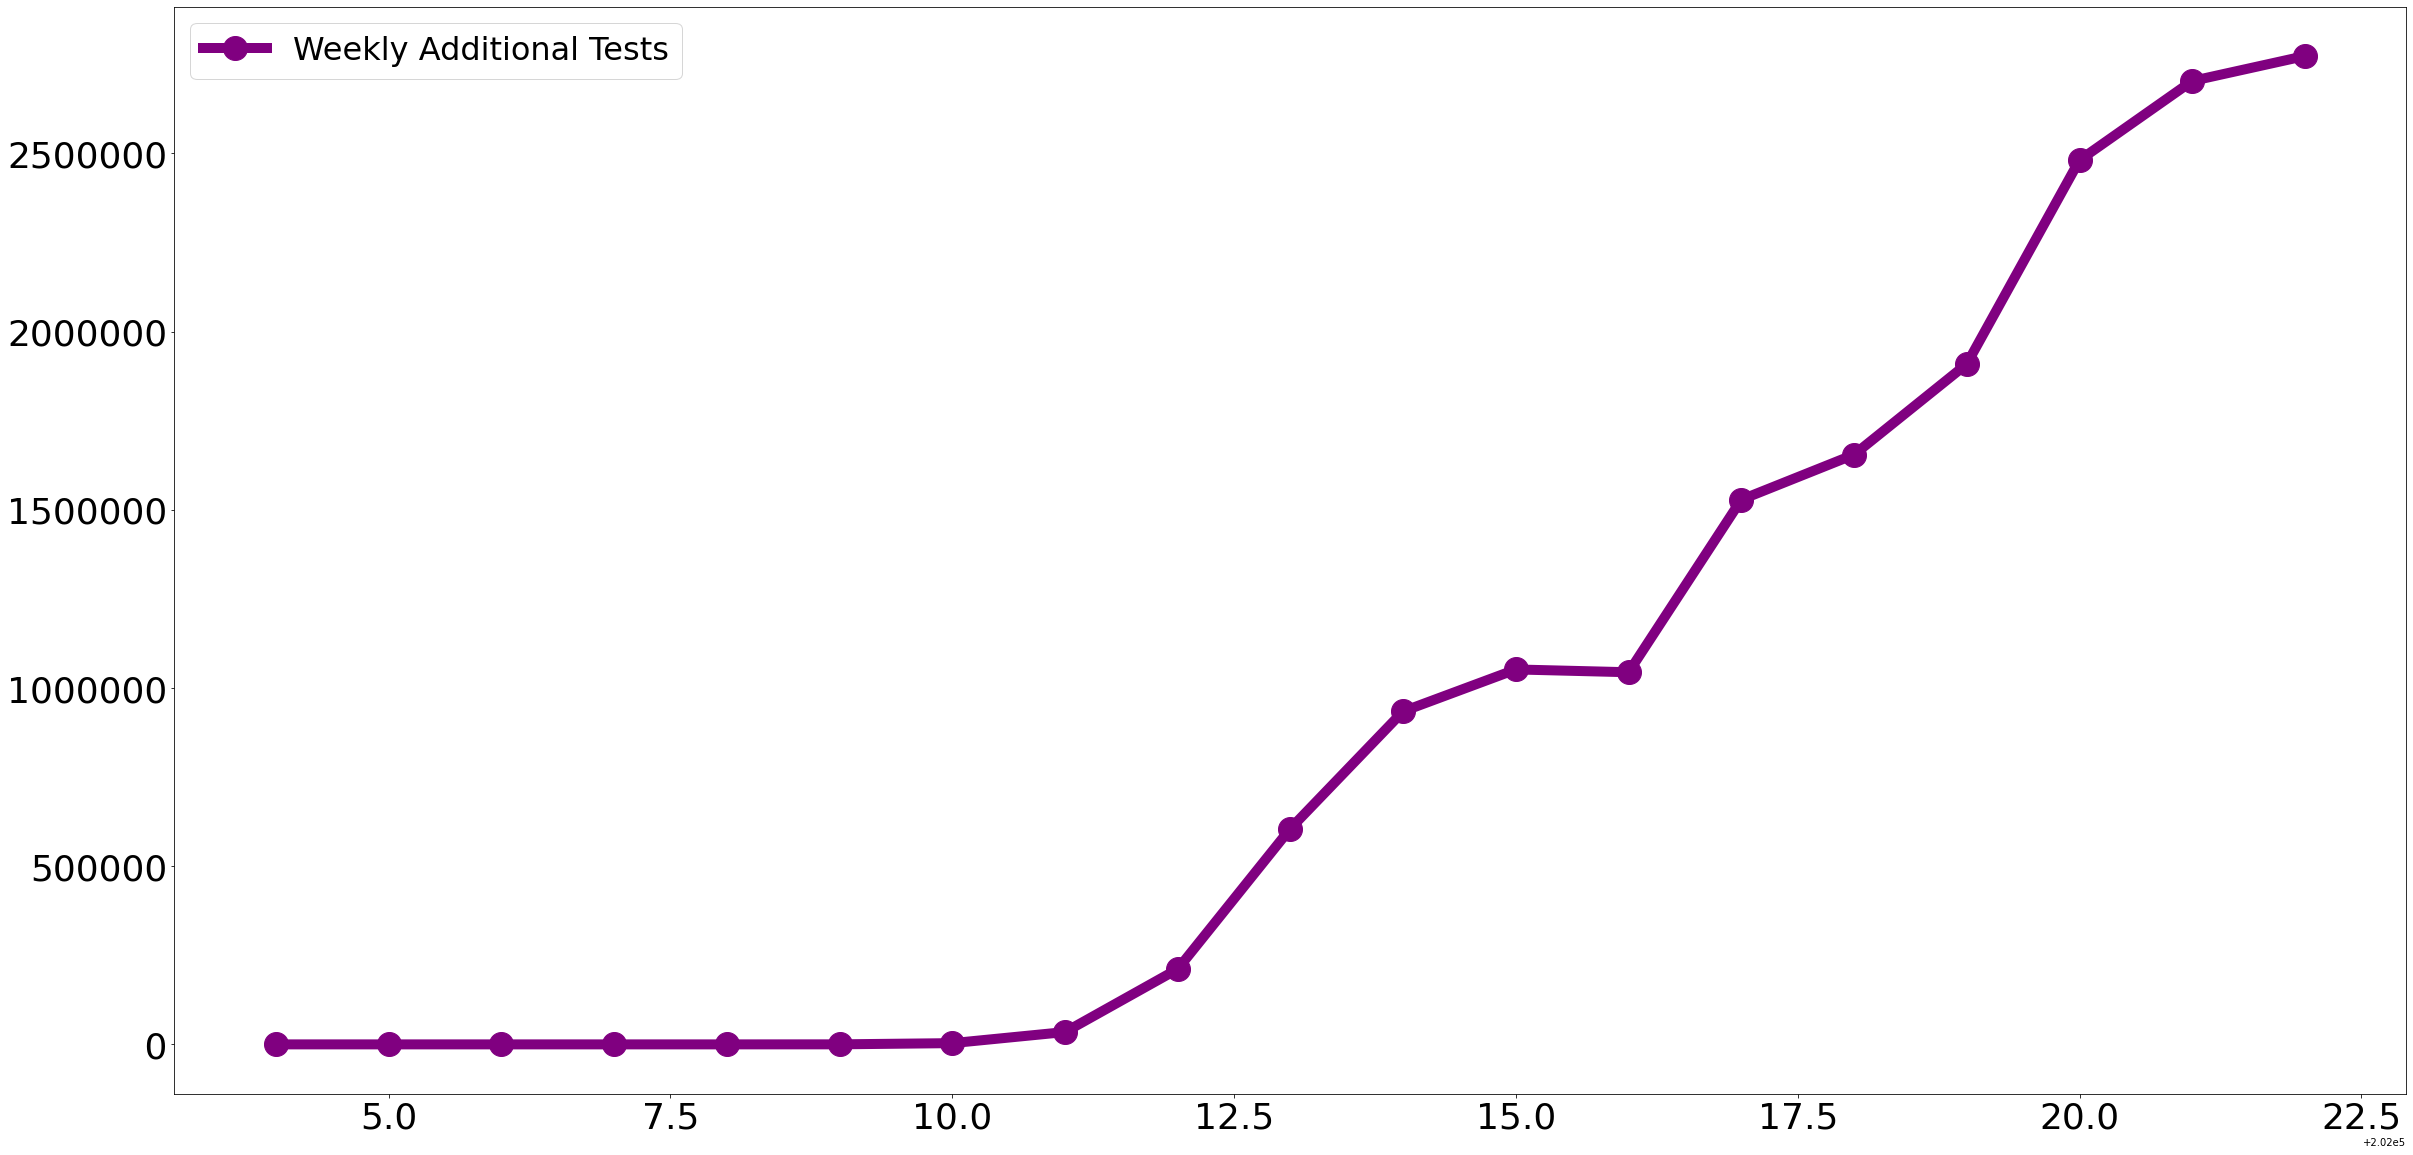

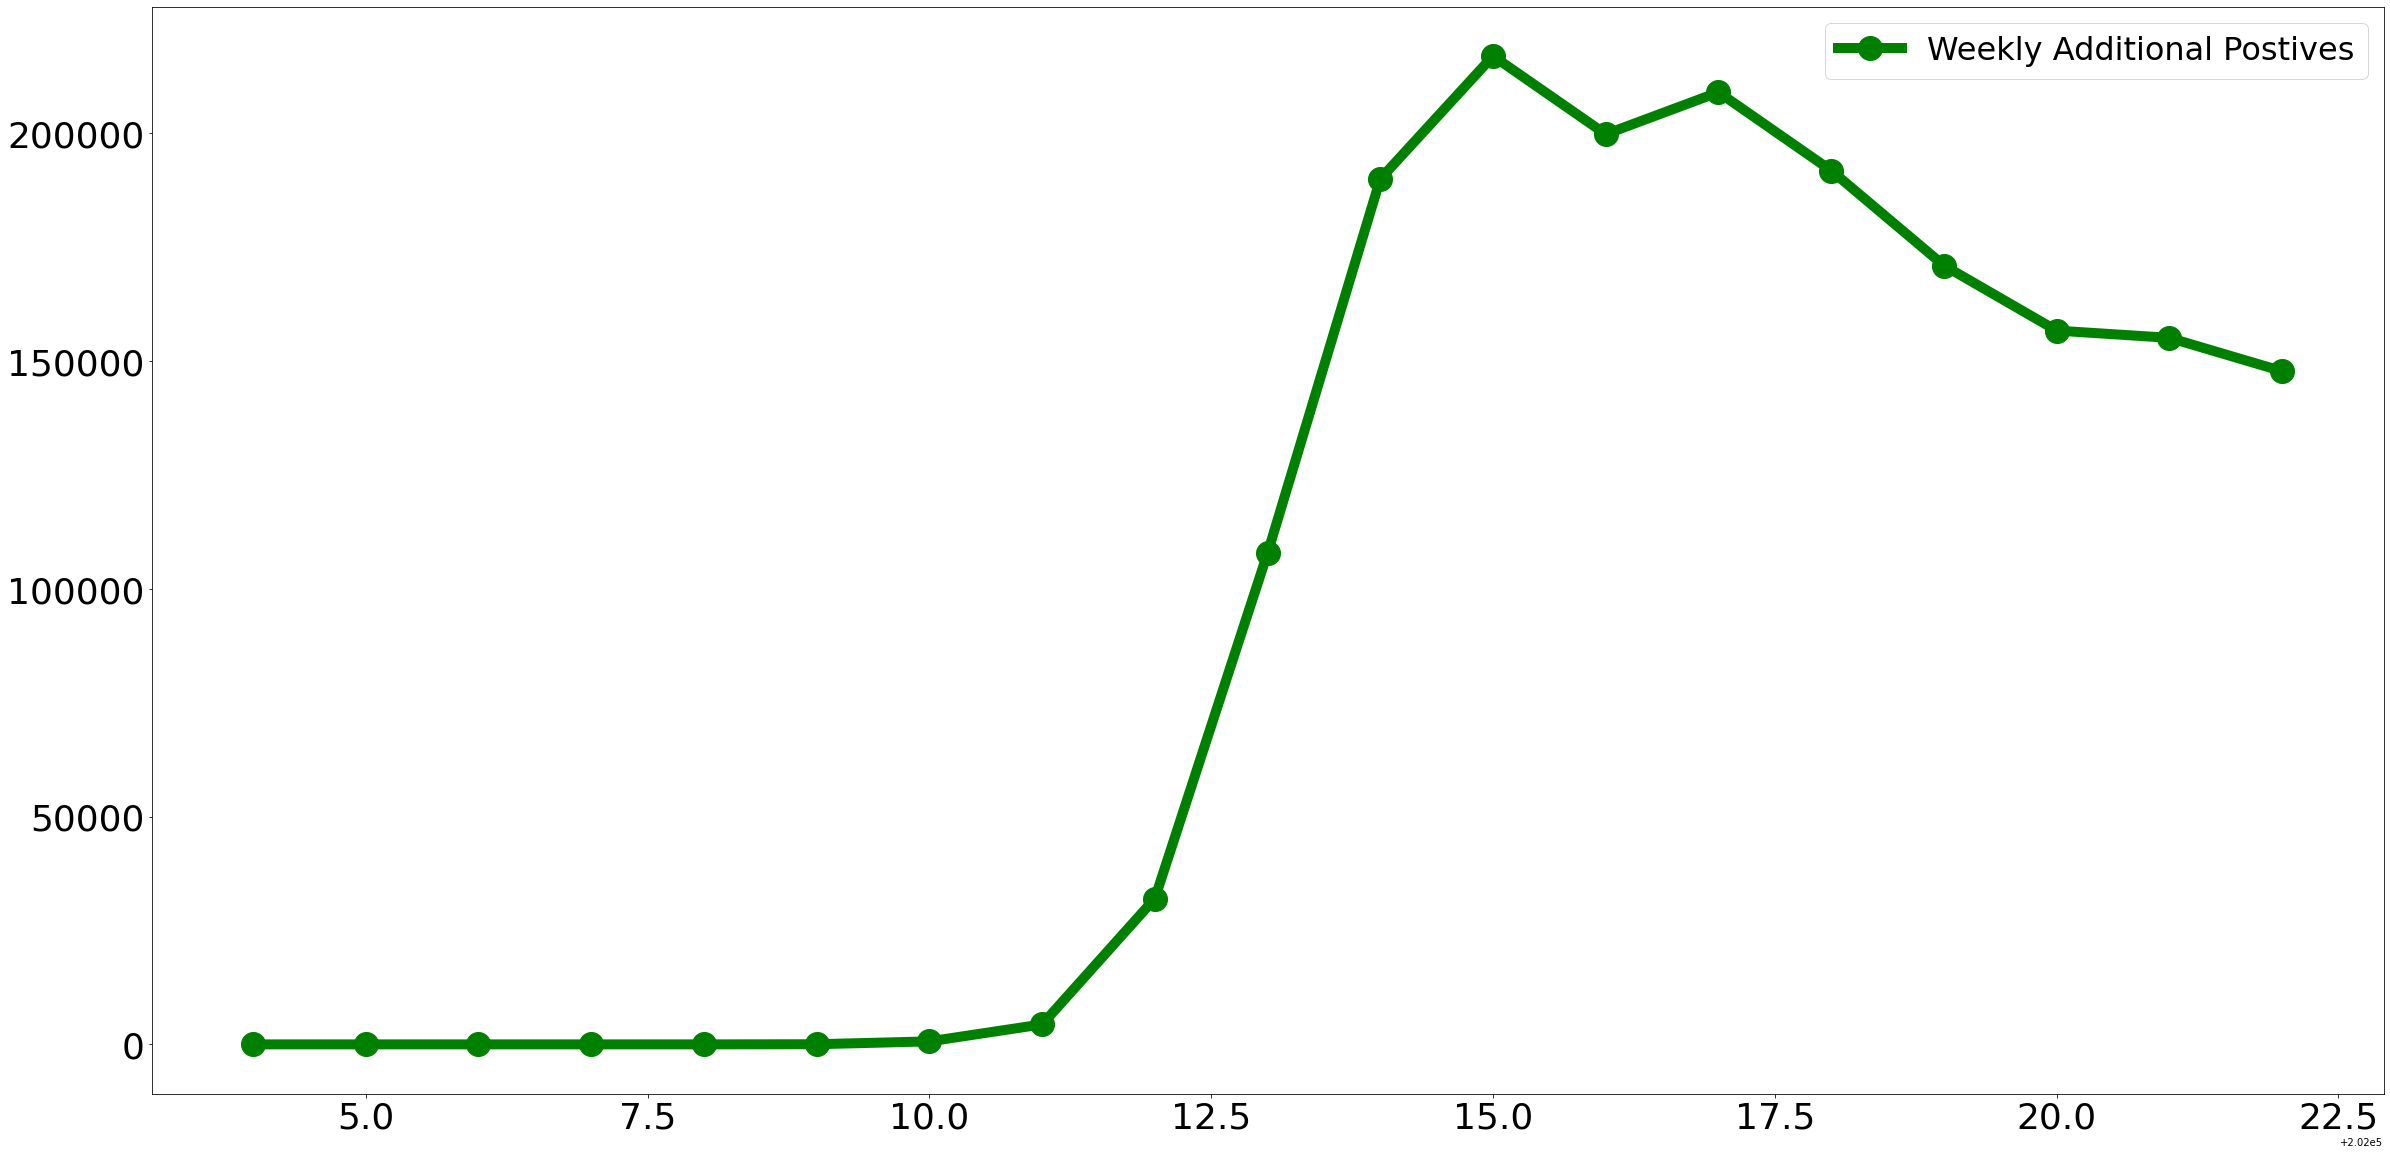

In [121]:
import matplotlib.ticker as ticker
plt1 = dfByWeekYear.sum()[:-1][['deathIncrease']].plot.line(figsize=(40,20), \
    fontsize=36, style='.-', markersize=48, linewidth=10, color='red')
plt1.legend(['Weekly Additional Deaths'],fontsize=32)
plt2 = dfByWeekYear.sum()[:-1][['totalTestResultsIncrease']].plot.line(figsize=(40,20), \
    fontsize=36, style='.-', markersize=48, linewidth=10, color='purple')
plt2.legend(['Weekly Additional Tests'],fontsize=32)

plt2.yaxis.set_major_formatter(ticker.FormatStrFormatter('%6.0d'))
    
plt3 = dfByWeekYear.sum()[:-1][['positiveIncrease']].plot.line(figsize=(40,20), \
    fontsize=36, style='.-', markersize=48, linewidth=10, color='green')
plt3.legend(['Weekly Additional Postives'],fontsize=32)

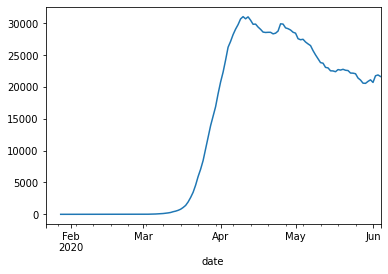

In [122]:
dfCovidtracking.groupby(by='date').sum().rolling(window=7).mean().positiveIncrease.plot.line()

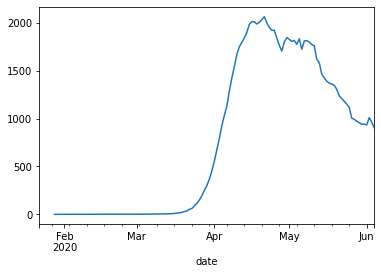

In [123]:
dfCovidtracking.groupby(by='date').sum().rolling(window=7).mean().deathIncrease.plot.line()

In [0]:
dfCAAvg = dfCovidtracking[dfCovidtracking.state=='CA'] \
.groupby(by='date').sum().rolling(window=7).mean()

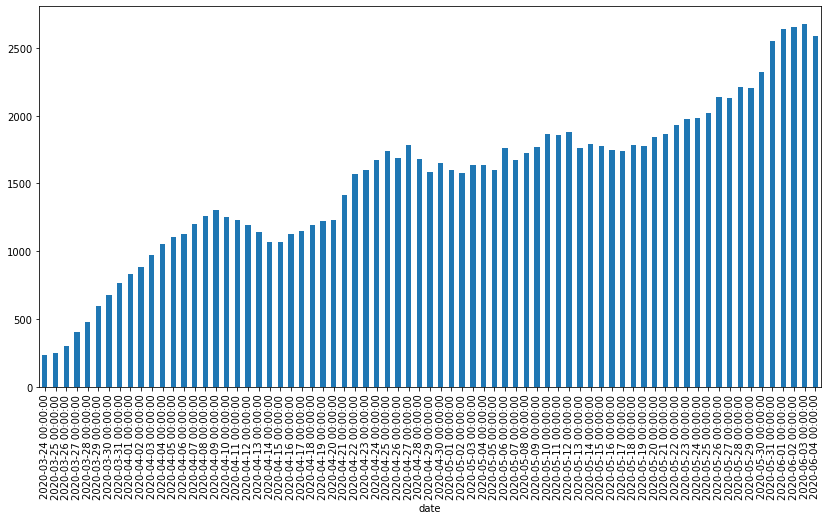

In [125]:

graph1 = dfCAAvg[20:].positiveIncrease.plot.bar(figsize=(14,7))


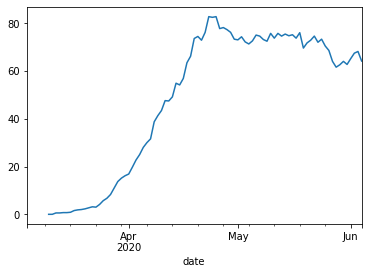

In [126]:
dfCAAvg.deathIncrease.plot.line()

In [127]:
dfDates = dfState.reset_index().copy()
dfDates[(dfDates.state.isin(['AL']))].head(10)

,state,date,positive,death,total_positive,pct
91,AL,2020-06-04,19072,653,19072,1.000000
92,AL,2020-06-03,18851,653,19072,0.988412
93,AL,2020-06-02,18642,651,19072,0.977454
94,AL,2020-06-01,18363,646,19072,0.962825
95,AL,2020-05-31,17903,631,19072,0.938706
96,AL,2020-05-30,17359,618,19072,0.910182
97,AL,2020-05-29,16823,605,19072,0.882078
98,AL,2020-05-28,16310,590,19072,0.855180
99,AL,2020-05-27,15843,581,19072,0.830694
100,AL,2020-05-26,15396,575,19072,0.807257


In [128]:
datecutoff = dfDates.date.max()-datetime.timedelta(days=7)
dfDates[(dfDates.date == datecutoff) & (dfDates.pct < .85)].sort_values(by='pct')


,state,date,positive,death,total_positive,pct
3812,PR,2020-05-28,3486,131,4508,0.773292
360,AZ,2020-05-28,17763,857,22753,0.780688
2710,NC,2020-05-28,25412,827,31966,0.794970
188,AR,2020-05-28,6538,120,8067,0.810462
4357,UT,2020-05-28,8921,106,10813,0.825025
7,AK,2020-05-28,425,10,513,0.828460
3989,SC,2020-05-28,10788,470,13005,0.829527
2449,MP,2020-05-28,22,2,26,0.846154
1724,KY,2020-05-28,9077,400,10705,0.847922
453,CA,2020-05-28,101697,3973,119807,0.848840


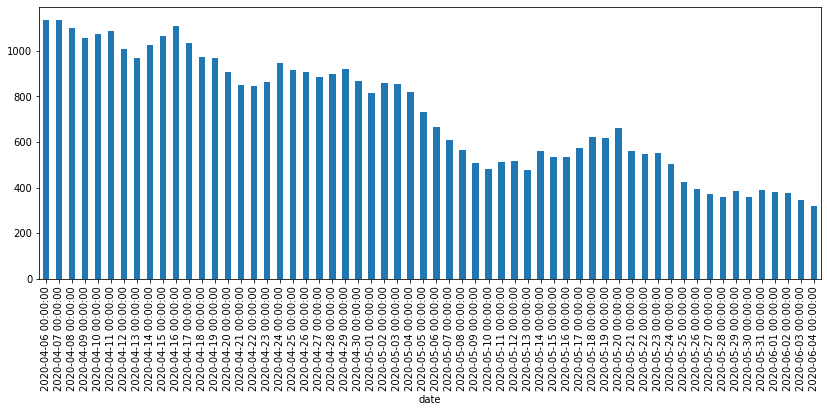

In [129]:

def showStateData(state):
  return dfCovidtracking[dfCovidtracking.state==state]\
  .sort_index()\
  .copy()



chart = showStateData('MI')\
.positiveIncrease\
.rolling(window=7)\
.mean()[-60:].plot.bar(figsize=(14,5))

In [130]:
dfTest = dfCovidtracking[dfCovidtracking.state=='CA'].sort_index().copy()
dfTest.head()

,state,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,onVentilatorCumulative,recovered,dataQualityGrade,lastUpdateEt,dateModified,checkTimeEt,death,hospitalized,dateChecked,fips,positiveIncrease,negativeIncrease,total,totalTestResults,totalTestResultsIncrease,posNeg,deathIncrease,hospitalizedIncrease,hash,commercialScore,negativeRegularScore,negativeScore,positiveScore,score,grade
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-03-04,CA,53,462,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0.0,0,06,0,0,515,515,0,515,0,0,ae2b9d2e5d691c66d1abe7c43c3564e865279fd9,0,0,0,0,0,
2020-03-05,CA,53,462,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0.0,0,06,0,0,515,515,0,515,0,0,10c1ce97af2a37d316e43bb512b486d8c380ca37,0,0,0,0,0,
2020-03-06,CA,60,462,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0.0,0,06,7,0,522,522,7,522,0,0,2790f2f9e9ab3cc94caca4b0a2c7d0ecb23ddcf6,0,0,0,0,0,
2020-03-07,CA,69,462,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0.0,0,06,9,0,531,531,9,531,0,0,af5f339fc3168c1f9135ea735ef21475b35a8c01,0,0,0,0,0,
2020-03-08,CA,88,462,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0.0,0,06,19,0,550,550,19,550,0,0,bcf5160531e8ce70a9a61aa770e6aa4e869161ef,0,0,0,0,0,


In [131]:
dfTest.head()

,state,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,onVentilatorCumulative,recovered,dataQualityGrade,lastUpdateEt,dateModified,checkTimeEt,death,hospitalized,dateChecked,fips,positiveIncrease,negativeIncrease,total,totalTestResults,totalTestResultsIncrease,posNeg,deathIncrease,hospitalizedIncrease,hash,commercialScore,negativeRegularScore,negativeScore,positiveScore,score,grade
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-03-04,CA,53,462,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0.0,0,06,0,0,515,515,0,515,0,0,ae2b9d2e5d691c66d1abe7c43c3564e865279fd9,0,0,0,0,0,
2020-03-05,CA,53,462,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0.0,0,06,0,0,515,515,0,515,0,0,10c1ce97af2a37d316e43bb512b486d8c380ca37,0,0,0,0,0,
2020-03-06,CA,60,462,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0.0,0,06,7,0,522,522,7,522,0,0,2790f2f9e9ab3cc94caca4b0a2c7d0ecb23ddcf6,0,0,0,0,0,
2020-03-07,CA,69,462,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0.0,0,06,9,0,531,531,9,531,0,0,af5f339fc3168c1f9135ea735ef21475b35a8c01,0,0,0,0,0,
2020-03-08,CA,88,462,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0.0,0,06,19,0,550,550,19,550,0,0,bcf5160531e8ce70a9a61aa770e6aa4e869161ef,0,0,0,0,0,


# State Population Data


In [0]:
data_url = "https://www2.census.gov/programs-surveys/popest/datasets/2010-2019/national/totals/nst-est2019-alldata.csv"


In [0]:
dfUSPop = pd.read_csv(data_url)

In [134]:
import math
us_pop = dfUSPop.loc[0].POPESTIMATE2019 #Estimate from Wikipedia
res = dfCovidtracking.loc[dfCovidtracking.index.max()][['positive', 'negative', 'pending','death', 'total']].sum()
cir = res.positive/res.total
cfr = res.death/res.positive
p_aff= math.ceil(us_pop*cir)
p_dead= math.ceil(p_aff*cfr)
print(res)
print(f"Current Infection Rate {cir*100:2f}%")
print(f"Percentage of US affected: {(res.positive+res.death)/us_pop*100:2f}%")
print(f"Observed CFR: {cfr*100:2f}%")
print(f"Percentage of US tested/affected: {(res.negative+res.positive+res.death)/us_pop*100:2f}%")
print(f"Projected affected by cir = {p_aff:,d}")
print(f"Projected killed = {p_dead:,d}")


positive     1864112
negative    16816417
pending         3474
death         102101
total       18684003
dtype: int64
Current Infection Rate 9.977048%
Percentage of US affected: 0.599018%
Observed CFR: 5.477192%
Percentage of US tested/affected: 5.722233%
Projected affected by cir = 32,748,616
Projected killed = 1,793,705


In [0]:
!if [ ! -d "loc" ]; then \
git clone https://gist.github.com/rogerallen/1583593 --depth=1 --quiet loc; \
fi
import sys
sys.path.append("loc")




In [0]:
import us_state_abbrev as us_abbr


In [0]:
dfStatePop = dfUSPop[dfUSPop.STATE != 0].copy()

In [0]:
dfStatePop['ABBR']=dfStatePop.NAME.apply(lambda x: us_abbr.us_state_abbrev[x])

In [0]:
dfStatePop = dfStatePop.loc[:, ['ABBR', 'POPESTIMATE2019']]
dfStatePop.set_index('ABBR', inplace=True)

In [0]:
dfStateCovid = dfCovidtracking.loc[dfCovidtracking.index.max()].set_index('state')

In [0]:
dfStateJoin = dfStateCovid.join(dfStatePop)

In [142]:
pd.DataFrame([(dfStateJoin.positive / dfStateJoin.POPESTIMATE2019)*100, \
              (dfStateJoin.totalTestResults/ dfStateJoin.POPESTIMATE2019)*100],\
             index=['state_pos_pop','state_test_pop'] ).T.sort_values(by="state_pos_pop", ascending=False)[:51]

,state_pos_pop,state_test_pop
state,,
NY,1.928351,11.787210
NJ,1.829842,9.656729
MA,1.480783,9.066880
RI,1.446627,15.662555
DC,1.292244,7.239968
CT,1.212778,7.896279
DE,1.000859,6.768478
IL,0.984539,7.749604
MD,0.923932,5.574526


In [143]:
#print(f"Current Infection Rate {res.positive/res.total*100:2f}%")

print(f"Current Testing Percent {gbUSA.sum().tail(1).totalTestResults[0]/dfUSPop[dfUSPop.REGION=='0'].POPESTIMATE2019[0]*100:2f}%")

Current Testing Percent 5.691127%


In [144]:
dfJHUData.columns

Index(['FIPS', 'city', 'state', 'country', 'last_update', 'lat', 'lon',
       'confirmed', 'dead', 'recovered', 'active', 'key'],
      dtype='object')

# OWID Data

In [0]:
dfOwid = pd.read_csv("https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv")

In [146]:
dfOwid.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21816 entries, 0 to 21815
Data columns (total 33 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   iso_code                         21752 non-null  object 
 1   continent                        21595 non-null  object 
 2   location                         21816 non-null  object 
 3   date                             21816 non-null  object 
 4   total_cases                      21816 non-null  int64  
 5   new_cases                        21816 non-null  int64  
 6   total_deaths                     21816 non-null  int64  
 7   new_deaths                       21816 non-null  int64  
 8   total_cases_per_million          21431 non-null  float64
 9   new_cases_per_million            21431 non-null  float64
 10  total_deaths_per_million         21431 non-null  float64
 11  new_deaths_per_million           21431 non-null  float64
 12  total_tests       

In [0]:
dfOwidTests = dfOwid.dropna(subset=['total_tests']).copy()

In [0]:
dfOwidLatest = dfOwidTests.sort_values(by='date').groupby('iso_code').last()

In [149]:
dfOwidLatest.total_tests.sort_values(ascending=False)

iso_code
USA    18908412.0
RUS    11426045.0
ITA     3999591.0
IND     3966075.0
DEU     3952971.0
          ...    
BOL       31186.0
MMR       28251.0
MDV       25591.0
CRI       20122.0
ZWE       19290.0
Name: total_tests, Length: 84, dtype: float64

In [150]:
isUSA = dfOwidLatest.index.isin(['USA'])
NonUSTests = dfOwidLatest[~isUSA].total_tests.sum()
USTests = dfOwidLatest[isUSA].total_tests.sum()

print(f"Total testing done outside of USA: {NonUSTests:.0f}")
print(f"Total tests done in USA : {USTests:.0f}")
print(f"How many more times has the world tested more than the US: {NonUSTests/USTests:.1f}")

Total testing done outside of USA: 56152757
Total tests done in USA : 18908412
How many more times has the world tested more than the US: 3.0


In [151]:
dfOwidLatest[isUSA].sum()

continent                            North America
location                             United States
date                                    2020-06-02
total_cases                                1811277
new_cases                                    21086
total_deaths                                105147
new_deaths                                     764
total_cases_per_million                    5472.09
new_cases_per_million                       63.703
total_deaths_per_million                   317.662
new_deaths_per_million                       2.308
total_tests                            1.89084e+07
new_tests                              1.29629e+06
total_tests_per_thousand                    57.125
new_tests_per_thousand                       3.916
new_tests_smoothed                          532075
new_tests_smoothed_per_thousand              1.607
tests_units                        tests performed
stringency_index                             72.69
population                     

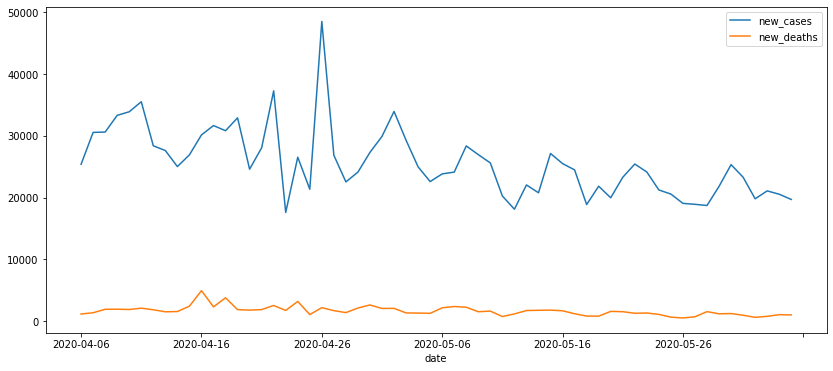

In [152]:
dfOwidUSA = dfOwid.loc[dfOwid.iso_code=='USA']

dfOwidUSA.set_index('date')[['new_cases','new_deaths']][-60:].plot.line(figsize=(14,6))

In [0]:
state = 'MN'
dfRollingWeekState = dfCovidtracking.loc[dfCovidtracking.state==state]\
.rolling(window=7).mean()


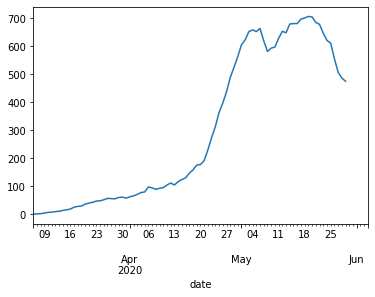

In [154]:
plt = dfRollingWeekState.positiveIncrease.plot.line()

In [155]:
dfJHUData[dfJHUData.state=='Florida'].confirmed.sum()

58764

In [0]:
doWGA = dfCovidtracking[dfCovidtracking.state=='GA'][['deathIncrease', 'hospitalizedIncrease', 'negativeIncrease','positiveIncrease','totalTestResultsIncrease']]\
.groupby(lambda x: x.dayofweek)

In [157]:
doWGA.sum()

,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
0,318,1076,76553,5815,82368
1,466,1723,66032,8118,74150
2,371,1851,-11209,8635,-2574
3,349,1268,63977,7418,71395
4,309,1224,81259,8198,89457
5,203,1095,81125,5966,87091
6,131,320,88747,5695,94442


# Socrata (San Francisco) Data

In [158]:
!pip install sodapy

In [0]:
from sodapy import Socrata

In [0]:
client = Socrata("data.sfgov.org", "LCSuN5PrqWkGtBe9dULkS75Rz")
results_df = pd.DataFrame.from_records(client.get("tvq9-ec9w"))

In [161]:
results_df.case_disposition.unique()

array(['Confirmed', 'Death'], dtype=object)

In [0]:
res = results_df.astype({'case_count':'int16'})

In [0]:
dfresConf = res[res.case_disposition=='Confirmed']
dfresDead = res[res.case_disposition=='Death']

In [0]:
dfTotals = dfresConf.groupby(by='date').sum().join(dfresDead.groupby(by='date').sum(), \
        rsuffix='dead').fillna(0) \
        .rename(columns={'case_count':'positive', 'case_countdead':'dead'})

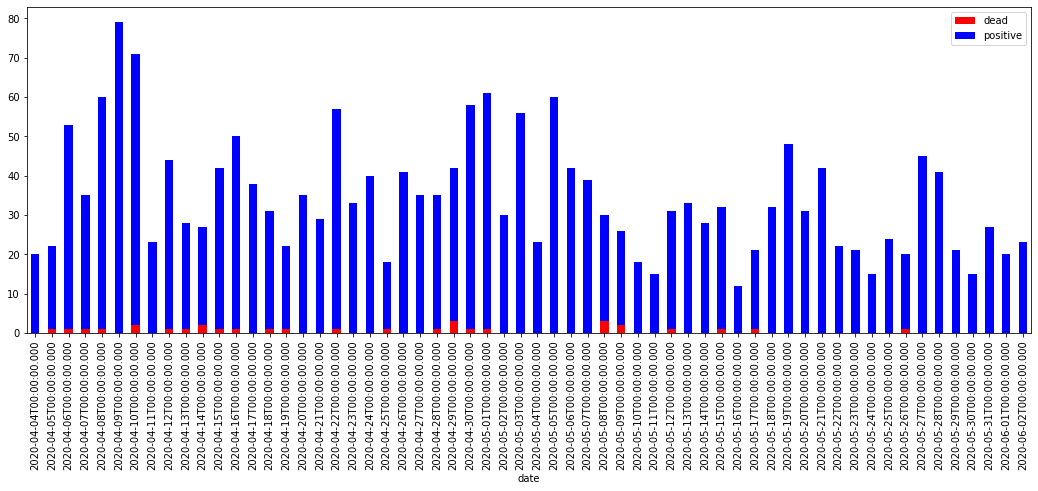

In [165]:
chart = dfTotals[['dead', 'positive']][-60:]\
.plot.bar(figsize=(18,6),stacked=True, color=['red','blue'])

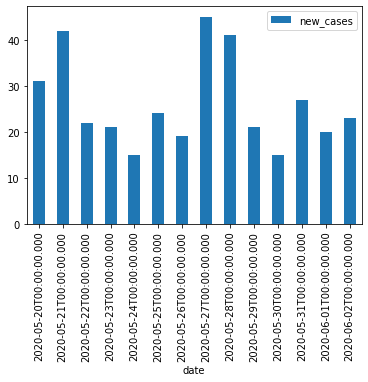

In [166]:
dfresConf.groupby('date').sum().rename(columns={'case_count':'new_cases'}).tail(14).plot.bar()

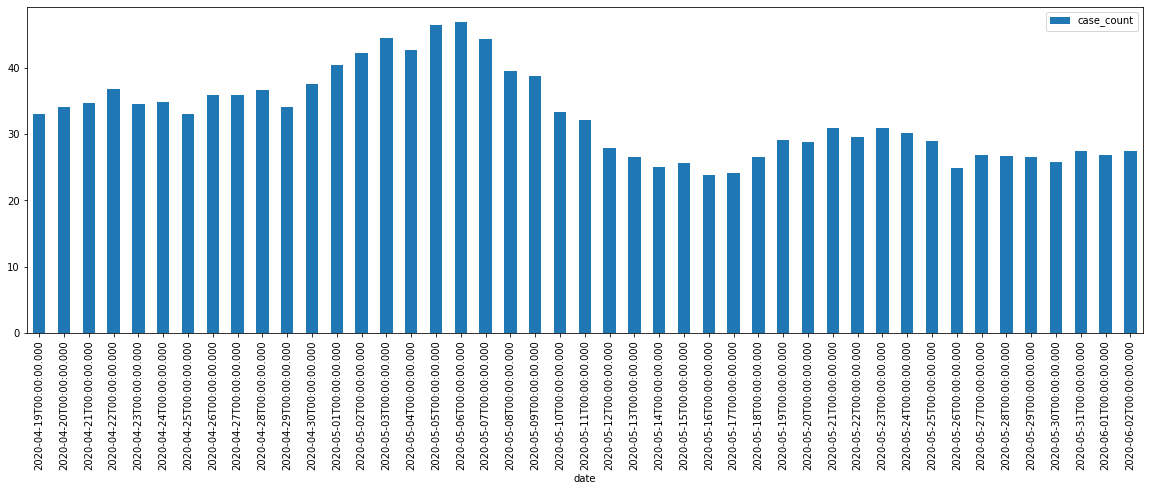

In [167]:
dfresConf.groupby('date').sum().rolling(window=7).mean()[-45:].plot.bar(figsize=(20,6))

# Marin Data

In [0]:
url = "https://docs.google.com/spreadsheets/d/e/2PACX-1vSRmO2pStf7Ft1yYjDULluZXzUAczGK_B34hDemDBadGEY0HTLwlcadF2cHNEwmmvLetUTf-D2ruYCT/pub?gid=0&single=true&output=csv"

df = pd.read_csv(url, header=1, parse_dates=[0], usecols=[0,1,3,5,6,7], index_col=[0])

In [169]:
df.tail()

,positive,deaths,tested,hospitalizations,Recovered
date,,,,,
2020-05-30,466,14.0,13186.0,52.0,312.0
2020-05-31,483,14.0,13579.0,52.0,317.0
2020-06-01,501,15.0,13752.0,52.0,330.0
2020-06-02,506,17.0,13791.0,52.0,340.0
2020-06-03,525,17.0,14430.0,52.0,366.0


In [170]:
df[['deaths','positive']].diff()

,deaths,positive
date,,
2020-03-06,NaN,NaN
2020-03-07,0.0,0.0
2020-03-08,0.0,1.0
2020-03-09,0.0,0.0
2020-03-10,NaN,0.0
...,...,...
2020-05-30,0.0,16.0
2020-05-31,0.0,17.0
2020-06-01,1.0,18.0


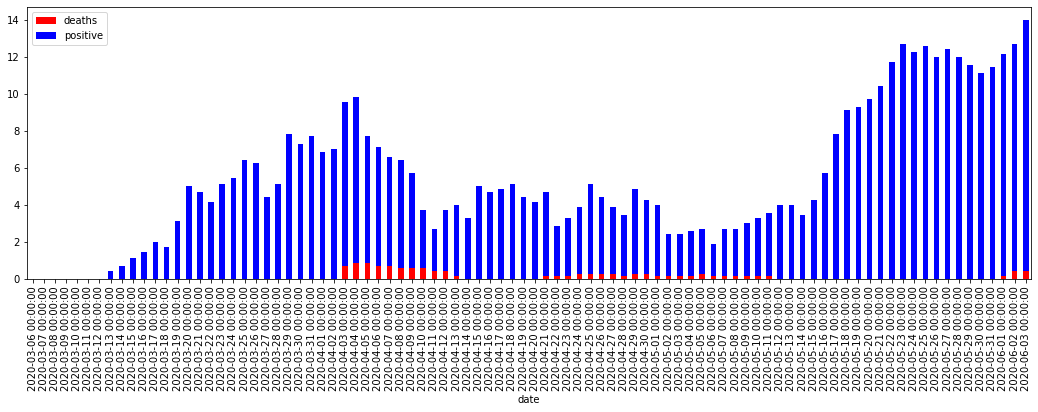

In [171]:
chart= df[['deaths','positive']].diff()\
.rolling(window=7).mean()[-90:]\
.plot.bar(stacked=True,figsize=(18,5), color=['r','b'])

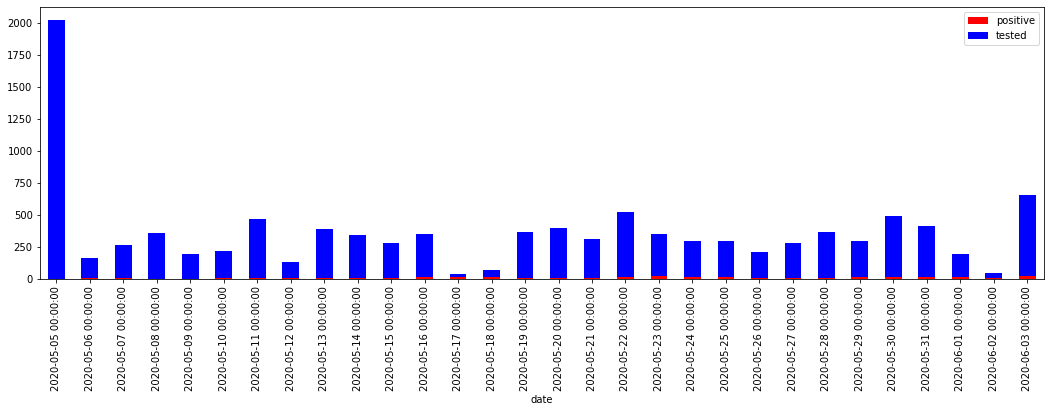

In [172]:
chart= df[['positive','tested']].diff()[-30:]\
.plot.bar(stacked=True,figsize=(18,5), color=['r','b'])

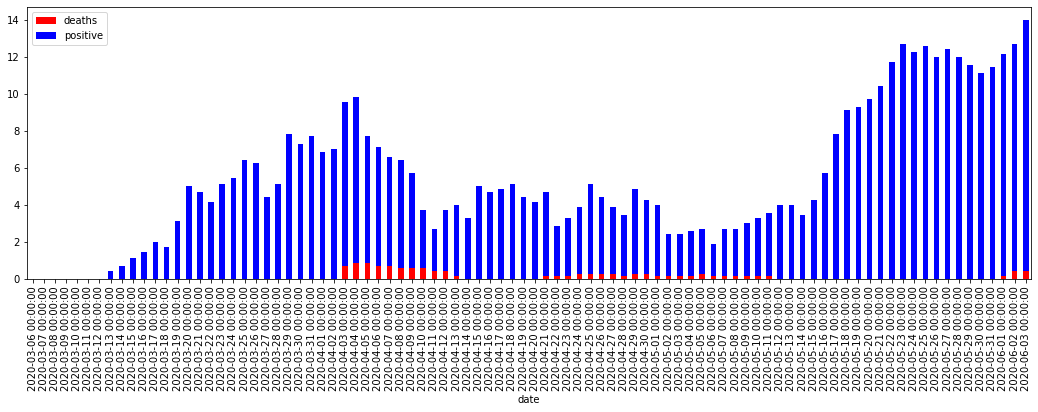

In [173]:
chart= df[['deaths','positive']].diff()\
.rolling(window=7).mean()[-90:]\
.plot.bar(stacked=True,figsize=(18,5), color=['r','b'])

In [174]:
marin_pop = 259725

print(f"Marin Population Positive: {(df[-1:].positive.values[0]/marin_pop)*100:2.2f}%")
print(f"Marin Population Tested: {(df[-1:].tested.values[0]/marin_pop)*100:2.2f}%")

Marin Population Positive: 0.20%
Marin Population Tested: 5.56%


In [175]:
df.positive.diff().rolling(window=7).mean().tail()

date
2020-05-30    11.142857
2020-05-31    11.428571
2020-06-01    12.000000
2020-06-02    12.285714
2020-06-03    13.571429
Name: positive, dtype: float64

In [176]:
dfCovidtracking[dfCovidtracking.state=='CA'].head(28)[::-1].positive.diff()


date
2020-05-08       NaN
2020-05-09    2049.0
2020-05-10    2119.0
2020-05-11    1259.0
2020-05-12    1443.0
2020-05-13    1759.0
2020-05-14    2023.0
2020-05-15    1772.0
2020-05-16    1857.0
2020-05-17    2046.0
2020-05-18    1591.0
2020-05-19    1365.0
2020-05-20    2262.0
2020-05-21    2140.0
2020-05-22    2247.0
2020-05-23    2187.0
2020-05-24    2079.0
2020-05-25    1848.0
2020-05-26    2175.0
2020-05-27    2247.0
2020-05-28    2717.0
2020-05-29    2189.0
2020-05-30    2992.0
2020-05-31    3705.0
2020-06-01    2423.0
2020-06-02    2304.0
2020-06-03    2377.0
2020-06-04    2120.0
Name: positive, dtype: float64